# 지하철 시간대별 데이터 시각화하기

* 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?
* 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은 어디일까?

대중교통 데이터를 바탕으로 질문에 답해보자.

In [ ]:
## 코랩을 사용할 때
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
%cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/13.데이터분석

In [ ]:
#코랩의 경우
# 나눔고딕 폰트 인스톨
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [6]:
pwd # 작업환경 확인

'c:\\Dev_work\\DS'

[참고링크]
seaborn : 통계를 더 다채롭게 표현 가능
https://seaborn.pydata.org/examples/errorband_lineplots.html
그러나 matplotl 과 seaborn 는 고정적이라는 단점.  
plotly 는 interactive함. 반응형의 시각화 라이브러리. 
최고 수치를 보여주고, 데이터를 확대해보여주기도함.
https://plotly.com/python/getting-started/


## 1. 지하철 시간대별 이용 현황 데이터 정제하기
---


In [23]:
# 라이브러리 로드
import pandas as pd

In [56]:
# 데이터 로드
# df = pd.read_csv('./data/subwaytime.csv', encoding='utf-8')
df = pd.read_csv('./data/subwaytime.csv', encoding='cp949', thousands=',') #thousands=','가 안먹힘

In [25]:
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2022-08,1호선,150.0,서울역,573,19,"8,638","8,274","12,332","45,706",...,"12,503","2,017","2,148",0,208,0,1,0,0,2022-09-03 10:18:29
2,2022-08,1호선,151.0,시청,39,0,"2,005","4,665","3,404","23,606",...,"2,631",320,688,2,7,0,0,0,0,2022-09-03 10:18:29
3,2022-08,1호선,152.0,종각,54,4,"3,356","4,382","3,765","22,971",...,"3,215",970,607,1,1,0,0,0,0,2022-09-03 10:18:29
4,2022-08,1호선,153.0,종로3가,118,10,"3,367","3,149","3,409","13,161",...,"3,575","1,177","1,455",1,30,0,0,0,0,2022-09-03 10:18:29


```
* 이상하게 데이터가 로드됩니다. 
* csv원본을 보고 이유를 찾아야합니다. 
* multi column 구조이기 때문입니다.
```

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   사용월                617 non-null    object 
 1   호선명                617 non-null    object 
 2   역ID                617 non-null    float64
 3   지하철역               617 non-null    object 
 4   04:00:00~04:59:59  618 non-null    object 
 5   Unnamed: 5         618 non-null    object 
 6   05:00:00~05:59:59  618 non-null    object 
 7   Unnamed: 7         618 non-null    object 
 8   06:00:00~06:59:59  618 non-null    object 
 9   Unnamed: 9         618 non-null    object 
 10  07:00:00~07:59:59  618 non-null    object 
 11  Unnamed: 11        618 non-null    object 
 12  08:00:00~08:59:59  618 non-null    object 
 13  Unnamed: 13        618 non-null    object 
 14  09:00:00~09:59:59  618 non-null    object 
 15  Unnamed: 15        618 non-null    object 
 16  10:00:00~10:59:59  618 non

In [10]:
# 컬럼들을 좀 봐야겠네~

df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51', '작업일시'],
      dtyp

In [52]:
df.columns.size

53

In [ ]:
# rename("before이름":"after이름")

## 컬럼이름 새로만들기

컬럼명 패턴

**사용월 호선명 역ID 지하철명 4_승차 4_하차 5_승차 5_하차 ....... 3_승차 3하차**

In [31]:
#새로운 컬럼이름으로 만듬
new_cols = ['사용월', '호선명', '역ID', '지하철역']

new_cols.append("4_승차")
new_cols.append("4_하차")
new_cols.append("5_승차")
new_cols.append("5_하차")
new_cols.append("6_승차")
new_cols.append("6_하차")

In [12]:
len(new_cols)

10

In [35]:
new_cols = ['사용월', '호선명', '역ID', '지하철역']

In [32]:
#새로운 컬럼이름으로 만듬
new_cols = ['사용월', '호선명', '역ID', '지하철역']

for i in range(4,28):
    a=i
    if i>=24:
        a=i-24
        new_cols.append(f'{a}_승차')
        new_cols.append(f'{a}_하차')

In [33]:
len(new_cols)

12

In [27]:
for i in range(4,24):
    new_cols.append(f'{i}_승차')
    new_cols.append(f'{i}_하차')
    
for i in range(0,4):
    new_cols.append(f'{i}_승차')
    new_cols.append(f'{i}_하차')

In [28]:
len(new_cols)

58

In [29]:
new_cols

['사용월',
 '호선명',
 '역ID',
 '지하철역',
 '4_승차',
 '4_하차',
 '5_승차',
 '5_하차',
 '6_승차',
 '6_하차',
 '4_승차',
 '4_하차',
 '5_승차',
 '5_하차',
 '6_승차',
 '6_하차',
 '7_승차',
 '7_하차',
 '8_승차',
 '8_하차',
 '9_승차',
 '9_하차',
 '10_승차',
 '10_하차',
 '11_승차',
 '11_하차',
 '12_승차',
 '12_하차',
 '13_승차',
 '13_하차',
 '14_승차',
 '14_하차',
 '15_승차',
 '15_하차',
 '16_승차',
 '16_하차',
 '17_승차',
 '17_하차',
 '18_승차',
 '18_하차',
 '19_승차',
 '19_하차',
 '20_승차',
 '20_하차',
 '21_승차',
 '21_하차',
 '22_승차',
 '22_하차',
 '23_승차',
 '23_하차',
 '0_승차',
 '0_하차',
 '1_승차',
 '1_하차',
 '2_승차',
 '2_하차',
 '3_승차',
 '3_하차']

In [51]:
for i in range(24):
  if i <20:
    new_cols.append(f"{i+4}_승차")
    new_cols.append(f"{i+4}_하차")
  elif i == 20:
    new_cols.append("0_승차")
    new_cols.append("0_하차")
  else:
    new_cols.append(f"{i-20}_승차")
    new_cols.append(f"{i-20}_하차")
# len(new_cols) 하면 52가 나오긴 합니다ㅠ

In [37]:
len(new_cols)

52

In [38]:
new_cols

['사용월',
 '호선명',
 '역ID',
 '지하철역',
 '4_승차',
 '4_하차',
 '5_승차',
 '5_하차',
 '6_승차',
 '6_하차',
 '7_승차',
 '7_하차',
 '8_승차',
 '8_하차',
 '9_승차',
 '9_하차',
 '10_승차',
 '10_하차',
 '11_승차',
 '11_하차',
 '12_승차',
 '12_하차',
 '13_승차',
 '13_하차',
 '14_승차',
 '14_하차',
 '15_승차',
 '15_하차',
 '16_승차',
 '16_하차',
 '17_승차',
 '17_하차',
 '18_승차',
 '18_하차',
 '19_승차',
 '19_하차',
 '20_승차',
 '20_하차',
 '21_승차',
 '21_하차',
 '22_승차',
 '22_하차',
 '23_승차',
 '23_하차',
 '0_승차',
 '0_하차',
 '1_승차',
 '1_하차',
 '2_승차',
 '2_하차',
 '3_승차',
 '3_하차']

In [ ]:
new_cols = ['사용월', '호선명', '역ID', '지하철역']
for i in range(4,25) :
    new_cols.append(f'{i% 11 }_승차')
    new_cols.append(f'{i% 11 }_하차')
3:22
# ㅜㅜ잘안됩니당.. 수정필요

In [41]:
for i in range(0, 24) :
    hour = i + 4
    if hour < 24 :
        new_cols.append(f'{hour}_승차')
        new_cols.append(f'{hour}_하차')
    else :
        hour = hour - 24
        new_cols.append(f'{hour}_승차')
        new_cols.append(f'{hour}_하차')

In [42]:
len(new_cols)

52

In [57]:
new_cols = ['사용월', '호선명', '역ID', '지하철역']

In [58]:
for i in range(4,28):
  a=i
  if i>=24:
    a=i-24
  new_cols.append(f'{a}_승차')
  new_cols.append(f'{a}_하차')

In [59]:
len(new_cols)

52

In [ ]:
new_cols = ['사용월', '호선명', '역ID', '지하철역']
num1=[]
num2=[]
for n in range(24):
  if n<4:
    num1.append(f'{n}_승차')
    num1.append(f'{n}_하차')
  elif n>=4:
    num2.append(f'{n}_승차')
    num2.append(f'{n}_하차')
total_cols=new_cols+num2+num1

In [49]:
len(new_cols)

4

In [53]:
#작업일시를 제외하고 데이터만 추출
real_data=df.iloc[1:,:-1]
# real_data=df.iloc[1:,:-1].values
real_data.columns=new_cols
real_data.reset_index(drop=True,inplace=True)
real_data.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2022-08,1호선,150.0,서울역,573,19,"8,638","8,274","12,332","45,706",...,"22,497","12,503","2,017","2,148",0,208,0,1,0,0
1,2022-08,1호선,151.0,시청,39,0,"2,005","4,665","3,404","23,606",...,"8,948","2,631",320,688,2,7,0,0,0,0
2,2022-08,1호선,152.0,종각,54,4,"3,356","4,382","3,765","22,971",...,"26,636","3,215",970,607,1,1,0,0,0,0
3,2022-08,1호선,153.0,종로3가,118,10,"3,367","3,149","3,409","13,161",...,"14,726","3,575","1,177","1,455",1,30,0,0,0,0
4,2022-08,1호선,154.0,종로5가,38,2,"1,632","3,635","2,766","15,329",...,"5,541","2,481",194,728,1,1,0,0,0,0


In [54]:
subway = df.iloc[1:,0:52]
subway.columns = new_cols

In [55]:
df_new=df.iloc[:,0:52]
df_new.columns=new_cols

In [60]:
#작업일시를 제외하고 데이터만 추출
value = df.iloc[1:, :-1].values
value

array([['2022-08', '1호선', 150.0, ..., '1', '0', '0'],
       ['2022-08', '1호선', 151.0, ..., '0', '0', '0'],
       ['2022-08', '1호선', 152.0, ..., '0', '0', '0'],
       ...,
       ['2022-08', '신림선', 4409.0, ..., '0', '0', '0'],
       ['2022-08', '신림선', 4410.0, ..., '0', '0', '0'],
       ['2022-08', '신림선', 4411.0, ..., '0', '0', '0']], dtype=object)

In [61]:
value.shape

(617, 52)

In [66]:
#새롭게 만든 컬럼 이름으로 새로운 데이터프레임을 만듬
new_df = pd.DataFrame(data=value, columns=new_cols)
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2022-08,1호선,150.0,서울역,573,19,"8,638","8,274","12,332","45,706",...,"22,497","12,503","2,017","2,148",0,208,0,1,0,0
1,2022-08,1호선,151.0,시청,39,0,"2,005","4,665","3,404","23,606",...,"8,948","2,631",320,688,2,7,0,0,0,0
2,2022-08,1호선,152.0,종각,54,4,"3,356","4,382","3,765","22,971",...,"26,636","3,215",970,607,1,1,0,0,0,0
3,2022-08,1호선,153.0,종로3가,118,10,"3,367","3,149","3,409","13,161",...,"14,726","3,575","1,177","1,455",1,30,0,0,0,0
4,2022-08,1호선,154.0,종로5가,38,2,"1,632","3,635","2,766","15,329",...,"5,541","2,481",194,728,1,1,0,0,0,0


In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    object
 3   지하철역    617 non-null    object
 4   4_승차    617 non-null    object
 5   4_하차    617 non-null    object
 6   5_승차    617 non-null    object
 7   5_하차    617 non-null    object
 8   6_승차    617 non-null    object
 9   6_하차    617 non-null    object
 10  7_승차    617 non-null    object
 11  7_하차    617 non-null    object
 12  8_승차    617 non-null    object
 13  8_하차    617 non-null    object
 14  9_승차    617 non-null    object
 15  9_하차    617 non-null    object
 16  10_승차   617 non-null    object
 17  10_하차   617 non-null    object
 18  11_승차   617 non-null    object
 19  11_하차   617 non-null    object
 20  12_승차   617 non-null    object
 21  12_하차   617 non-null    object
 22  13_승차   617 non-null    ob

```
승하차와 관련한 숫자들의 타입이 object이다. 문자열이라는 의미
숫자로 형변환이 필요하겠다.
```

In [68]:
#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제 : str.replace(',','')
for col in new_df.columns[4:]:
    print(col)
    


4_승차
4_하차
5_승차
5_하차
6_승차
6_하차
7_승차
7_하차
8_승차
8_하차
9_승차
9_하차
10_승차
10_하차
11_승차
11_하차
12_승차
12_하차
13_승차
13_하차
14_승차
14_하차
15_승차
15_하차
16_승차
16_하차
17_승차
17_하차
18_승차
18_하차
19_승차
19_하차
20_승차
20_하차
21_승차
21_하차
22_승차
22_하차
23_승차
23_하차
0_승차
0_하차
1_승차
1_하차
2_승차
2_하차
3_승차
3_하차


In [69]:
#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제 : str.replace(',','')

for col in new_df.columns[4:]:
    # print(col)
    new_df[col] = new_df[col].str.replace(',','')

new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2022-08,1호선,150.0,서울역,573,19,8638,8274,12332,45706,...,22497,12503,2017,2148,0,208,0,1,0,0
1,2022-08,1호선,151.0,시청,39,0,2005,4665,3404,23606,...,8948,2631,320,688,2,7,0,0,0,0
2,2022-08,1호선,152.0,종각,54,4,3356,4382,3765,22971,...,26636,3215,970,607,1,1,0,0,0,0
3,2022-08,1호선,153.0,종로3가,118,10,3367,3149,3409,13161,...,14726,3575,1177,1455,1,30,0,0,0,0
4,2022-08,1호선,154.0,종로5가,38,2,1632,3635,2766,15329,...,5541,2481,194,728,1,1,0,0,0,0


In [70]:
#형변환을 하기위해 : astype('int64')
#승하차 관련 컬럼들에서 콤마 삭제 : str.replace(',','')

for col in new_df.columns[4:]:
    new_df[col] = new_df[col].astype('int64')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    object
 3   지하철역    617 non-null    object
 4   4_승차    617 non-null    int64 
 5   4_하차    617 non-null    int64 
 6   5_승차    617 non-null    int64 
 7   5_하차    617 non-null    int64 
 8   6_승차    617 non-null    int64 
 9   6_하차    617 non-null    int64 
 10  7_승차    617 non-null    int64 
 11  7_하차    617 non-null    int64 
 12  8_승차    617 non-null    int64 
 13  8_하차    617 non-null    int64 
 14  9_승차    617 non-null    int64 
 15  9_하차    617 non-null    int64 
 16  10_승차   617 non-null    int64 
 17  10_하차   617 non-null    int64 
 18  11_승차   617 non-null    int64 
 19  11_하차   617 non-null    int64 
 20  12_승차   617 non-null    int64 
 21  12_하차   617 non-null    int64 
 22  13_승차   617 non-null    in

## 2. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까
---
아침 7시 승차 데이터의 위치를 확인하니 10번 인덱스에 저장되었있음을 확인할 수 있다.

In [74]:
new_df.head(11)

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2022-08,1호선,150.0,서울역,573,19,8638,8274,12332,45706,...,22497,12503,2017,2148,0,208,0,1,0,0
1,2022-08,1호선,151.0,시청,39,0,2005,4665,3404,23606,...,8948,2631,320,688,2,7,0,0,0,0
2,2022-08,1호선,152.0,종각,54,4,3356,4382,3765,22971,...,26636,3215,970,607,1,1,0,0,0,0
3,2022-08,1호선,153.0,종로3가,118,10,3367,3149,3409,13161,...,14726,3575,1177,1455,1,30,0,0,0,0
4,2022-08,1호선,154.0,종로5가,38,2,1632,3635,2766,15329,...,5541,2481,194,728,1,1,0,0,0,0
5,2022-08,1호선,155.0,동대문,561,16,9859,1842,8375,6305,...,4047,7319,292,1711,0,144,0,0,0,0
6,2022-08,1호선,156.0,신설동,309,22,8586,2260,8758,9028,...,3394,7257,294,1806,0,7,0,0,0,0
7,2022-08,1호선,157.0,제기동,357,4,5001,2038,8276,8838,...,1992,6002,100,1141,0,2,0,0,0,0
8,2022-08,1호선,158.0,청량리(서울시립대입구),915,17,10286,4451,15174,21761,...,3086,8582,173,3132,0,6,0,0,0,0
9,2022-08,1호선,159.0,동묘앞,145,1,2799,1039,3456,4571,...,1225,3281,97,1297,2,270,0,0,0,0


In [78]:
df.iloc[:,10]

0          승차
1      39,560
2       6,430
3       5,801
4       4,642
        ...  
613     9,575
614     3,212
615    10,158
616    19,371
617     4,375
Name: 07:00:00~07:59:59, Length: 618, dtype: object

In [79]:
new_df['7_승차']

0      39560
1       6430
2       5801
3       4642
4       5251
       ...  
612     9575
613     3212
614    10158
615    19371
616     4375
Name: 7_승차, Length: 617, dtype: int64

In [81]:
len(new_df)

617

이 결과를 막대그래프로 표현해보자.

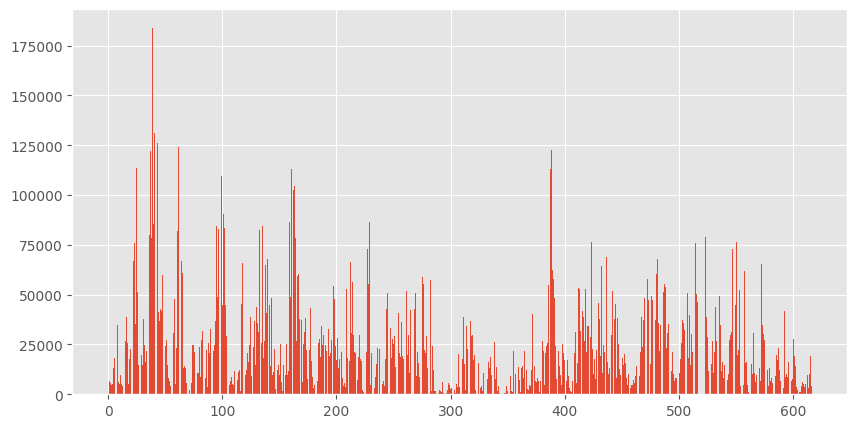

In [84]:
import matplotlib.pyplot as plt

plt.style.use('ggplot') # 스타일 지정
plt.figure(figsize=(10, 5)) # 스케치북 사이즈 
# 스케치북이 너무 작으면 변별력이 없어지고 스케치북이 너무 크면 가독성이 떨어지니 적당히 조절

plt.bar(range(len(new_df)), new_df['7_승차']) # X, Y 반드시 지정

plt.show()

편차가 매우 크다. 데이터를 오름차순으로 정렬해보자.

In [83]:
# new_df['7_승차'].sort_values(ascending=True) # 맞나? 확인해보기!


331         0
325         0
474         0
192         0
517         0
        ...  
388    122511
62     124350
43     126331
41     131269
39     184073
Name: 7_승차, Length: 617, dtype: int64

한개의 역이 다른 역들과는 큰 차이를 두고 많다는 것을 알 수 있다. 

그러면 출근 시간대라고 할 수 있는 7-9시까지 승차 인원을 합치면 어떻게 될까? (출근시간대_승차합계)

In [91]:
new_df['출근시간대_승차합계'] = new_df['7_승차'] + new_df['8_승차'] + new_df['9_승차']
new_df.head()


,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계
0,2022-08,1호선,150.0,서울역,573,19,8638,8274,12332,45706,...,12503,2017,2148,0,208,0,1,0,0,154546
1,2022-08,1호선,151.0,시청,39,0,2005,4665,3404,23606,...,2631,320,688,2,7,0,0,0,0,25005
2,2022-08,1호선,152.0,종각,54,4,3356,4382,3765,22971,...,3215,970,607,1,1,0,0,0,0,27170
3,2022-08,1호선,153.0,종로3가,118,10,3367,3149,3409,13161,...,3575,1177,1455,1,30,0,0,0,0,25674
4,2022-08,1호선,154.0,종로5가,38,2,1632,3635,2766,15329,...,2481,194,728,1,1,0,0,0,0,26373


In [88]:
new_df.sort_values(by='출근시간대_승차합계', ascending=False)

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계
39,2022-08,2호선,230.0,신림,255,17,38345,4005,71039,19111,...,69090,3995,20003,5,152,0,0,0,0,624717
37,2022-08,2호선,228.0,서울대입구(관악구청),4226,16,27452,2542,42736,14245,...,46001,2899,17062,4,3186,0,0,0,0,414094
41,2022-08,2호선,232.0,구로디지털단지,338,20,36294,5278,51355,20059,...,44414,2988,11913,8,158,0,0,0,0,413984
25,2022-08,2호선,216.0,잠실(송파구청),91,18,11471,4672,45486,31679,...,42137,3541,7798,3,31,1,0,0,0,381289
388,2022-08,5호선,2519.0,까치산,184,0,24650,1421,42926,8753,...,29245,688,8015,3,349,0,0,0,0,350371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2022-08,3호선,321.0,충무로,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
519,2022-08,7호선,2758.0,상동,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520,2022-08,7호선,2759.0,삼산체육관,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,2022-08,6호선,2649.0,신내,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# 출근시간대 승차인원이 가장 많은 지하철역은?
new_df.sort_values(by='출근시간대_승차합계', ascending=False).iloc[0,3]

'신림'

```
시간대를 늘렸지만 그래프의 형태는 거의 비슷하다. 
3시간 동안 60만명이 들어오는 역은 어딜까?
```

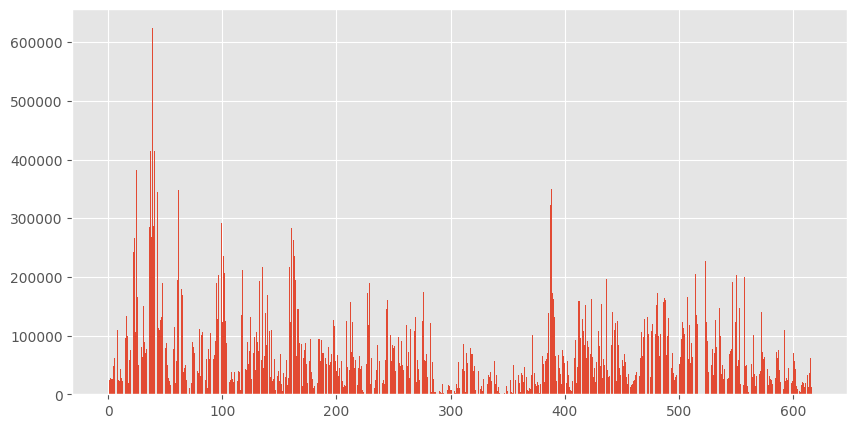

In [96]:
import matplotlib.pyplot as plt

plt.style.use('ggplot') # 스타일 지정
plt.figure(figsize=(10, 5)) # 스케치북 사이즈 

plt.bar(range(len(new_df)), new_df['출근시간대_승차합계']) # X, Y 반드시 지정

plt.show()

그러면 출근 시간대에 사람들이 가장 많이 내리는 역은 어디일까?

In [94]:
new_df['출근시간대_하차합계'] = new_df['7_하차'] + new_df['8_하차'] + new_df['9_하차']
new_df.sort_values(by='출근시간대_하차합계', ascending=False).head()


,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계,출근시간대_하차합계
30,2022-08,2호선,221.0,역삼,58,0,3914,7135,8565,37482,...,3527,2905,2,8,0,0,0,0,62783,802638
31,2022-08,2호선,222.0,강남,122,5,9527,11078,18061,51718,...,14129,5900,15,19,0,0,0,0,149588,755875
28,2022-08,2호선,219.0,삼성(무역센터),173,1,4755,5149,6945,40610,...,2527,3596,1,1024,0,0,0,0,52167,703925
512,2022-08,7호선,2748.0,가산디지털단지,800,5,6710,6695,9424,26225,...,1527,2579,3,10,0,0,0,0,64285,696751
29,2022-08,2호선,220.0,선릉,103,6,4662,6359,10585,41187,...,4210,4034,1,23,0,0,0,0,80902,618013


In [95]:
new_df.sort_values(by='출근시간대_하차합계', ascending=False).iloc[0,3]

'역삼'

## 3. 밤 11시에 사람들이 가장 많이 타는 역은 어디일까
---


In [97]:
import pandas as pd

df = pd.read_csv('./data/subwaytime.csv',encoding='cp949')

#새로운 컬럼이름으로 만듬
new_cols = ['사용월', '호선명', '역ID', '지하철역']

for i in range(4,24):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

for i in range(0,4):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

#데이터프레임에서 컬럼영역을 제외하고 데이터만 추출
value = df.iloc[1:,:-1].values

#새롭게 만든 컬럼 이름으로 새로운 데이터프레임을 만듬
new_df = pd.DataFrame(data=value,columns=new_cols)

#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제

for col in new_df.columns[4:]:
    new_df[col] = new_df[col].str.replace(',','')
for col in new_df.columns[4:]:
    new_df[col] = new_df[col].astype('int64')

In [99]:
#23시 승차로 정렬
new_df.sort_values(by='23_승차', ascending=False).head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
48,2022-08,2호선,239.0,홍대입구,674,15,24497,3627,29948,17014,...,81164,38764,10708,12881,5,1629,0,0,0,0
31,2022-08,2호선,222.0,강남,122,5,9527,11078,18061,51718,...,78388,22682,14129,5900,15,19,0,0,0,0
21,2022-08,2호선,212.0,건대입구,355,13,15746,1658,21120,17389,...,42044,28135,7003,9673,6,739,0,0,0,0
49,2022-08,2호선,240.0,신촌,61,5,7035,2743,14316,14992,...,32415,21931,4995,6178,3,89,0,0,0,0
47,2022-08,2호선,238.0,합정,81,4,8935,2963,17878,13679,...,32288,18800,5332,6598,6,72,0,0,0,0


In [101]:
#밤 11시에 사람들이 가장 많이 타는 역은?
new_df.sort_values(by='23_승차', ascending=False).iloc[0,3]

'홍대입구'

## 4. 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까
---


In [ ]:
import pandas as pd

df = pd.read_csv('./data/subwaytime.csv',encoding='cp949')

#새로운 컬럼이름으로 만듬
new_cols = ['사용월', '호선명', '역ID', '지하철역']

for i in range(4,24):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

for i in range(0,4):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

#데이터프레임에서 컬럼영역을 제외하고 데이터만 추출
value = df.iloc[1:,:-1].values

#새롭게 만든 컬럼 이름으로 새로운 데이터프레임을 만듬
new_df = pd.DataFrame(data=value,columns=new_cols)

#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제

for col in new_df.columns[4:]:
    new_df[col] = new_df[col].str.replace(',','')
for col in new_df.columns[4:]:
    new_df[col] = new_df[col].astype('int64')

In [ ]:
name_lst = []
count_lst = []


이 데이터를 바탕으로 막대그래프를 그려보자.

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family ='NanumGothic')

plt.bar(range(24), count_lst)
plt.xticks(range(24), name_lst , rotation =90)
plt.show()


x축에 시간이 표시되어 있지 않아서 알아보기 어렵다.

In [ ]:
name_lst = []
count_lst = []



In [ ]:
plt.bar(range(24), count_lst)
plt.xticks(range(24), name_lst , rotation =90)
plt.show()


## 5. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면
---
__만약 모든 지하철역의 시간대별 승하차 인원을 더하면 어떤 결과를 확인할 수 있을까?__

이 질문을 해결하기 위한 알고리즘은 다음과 같이 간단히 생각할 수 있다.

1. 데이터를 읽어온다.
2. 모든 역에 대해 시간대별 승차 인원과 하차 인원을 누적해서 더한다.
3. 시간대별 승차 인원과 하차 인원을 그래프로 표현한다.

In [ ]:
import pandas as pd

df = pd.read_csv('./data/subwaytime.csv',encoding='cp949')

#새로운 컬럼이름으로 만듬
new_cols = ['사용월', '호선명', '역ID', '지하철역']

for i in range(4,24):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

for i in range(0,4):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

#데이터프레임에서 컬럼영역을 제외하고 데이터만 추출
value = df.iloc[1:,:-1].values

#새롭게 만든 컬럼 이름으로 새로운 데이터프레임을 만듬
new_df = pd.DataFrame(data=value,columns=new_cols)

#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제

for col in new_df.columns[4:]:
    new_df[col] = new_df[col].str.replace(',','')
for col in new_df.columns[4:]:
    new_df[col] = new_df[col].astype('int64')

    
new_df.head()

In [ ]:
#컬럼별 총합









In [ ]:
#새로운 데이터프레임으로 만들기


In [ ]:
s_in = []
s_out = []



> * 출근 시간대는 7-8시, 8-9시에 승차 인원이 많고, 하차 인원은 8-9시가 눈에 띄게 많습니다. 
> * 퇴근 시간대는 승차는 18-19시에 눈에 띄게 많고, 하차는 18-19시, 19-20시에 가장 많은 것을 볼 수 있습니다. 